In [1]:
import csv

# Set Korean font
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df = csv.reader(open('Dataset.csv', 'r', encoding='utf-8'), delimiter='\t')

data = list(df)
# remove the first row of the data
data.pop(0)

# divide data depending on the class
class1 = []
class2 = []
for i in range(len(data)):
    try:
        if data[i][1] == '1':
            class1.append(data[i]) #non-hate speech
        else:
            class2.append(data[i]) #hate speech
    except:
        pass

csv 데이터셋을 불러와 클래스를 분류하는 작업이다.
class1을 비혐오, class2를 혐오로 분류했다.
극소수의 이용 불가능한 데이터는 제외했다.

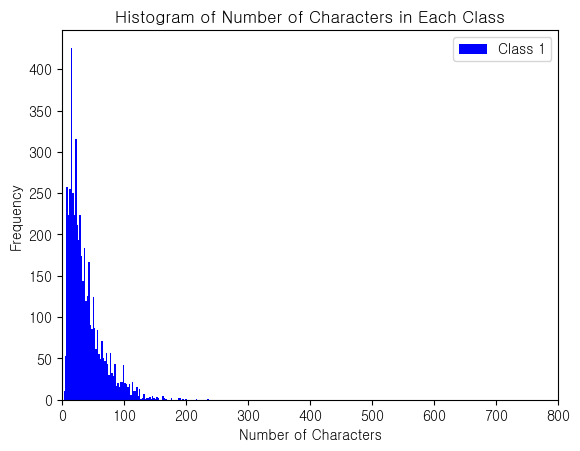

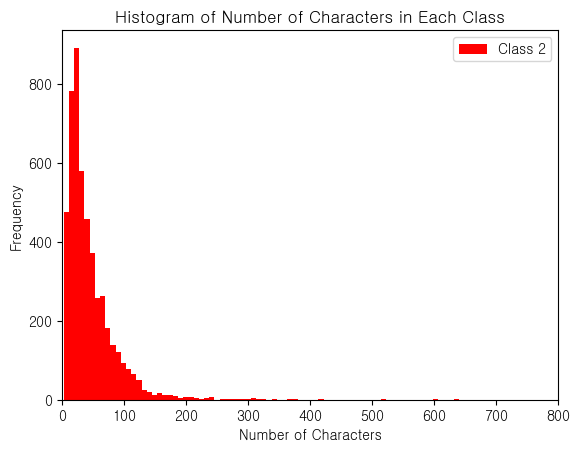

In [2]:
import matplotlib.pyplot as plt

# Calculate the number of characters in each class
class1_char_counts = [len(row[0]) for row in class1]
class2_char_counts = [len(row[0]) for row in class2]

# Two seperate non-transparent plot histograms of number of characters in each class with grid, class1 is blue, class2 is red
plt.hist(class1_char_counts, bins=100, label='Class 1', color='blue', alpha=1)
plt.xlim(0, 800)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Number of Characters in Each Class')
plt.show()
plt.hist(class2_char_counts, bins=100, label='Class 2', color='red', alpha=1)
plt.xlim(0, 800)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Number of Characters in Each Class')
plt.show()


각 클래스의 글자 수를 비교했다.
그래프의 형태는 얼추 비슷해 보이지만 주목할 점이 있다.
비교적 빈도수가 고르게 분포되어 있는 class1에 비해 class2는 비교적 특정 글자수 구간에 집중되어 있는 모습을 보였다.
그리고 class1은 200자가 넘는 장문의 글은 전무한데 비해 class2는 200자를 넘어선 장문의 글도 드물게 등장하는 특징을 보였다.

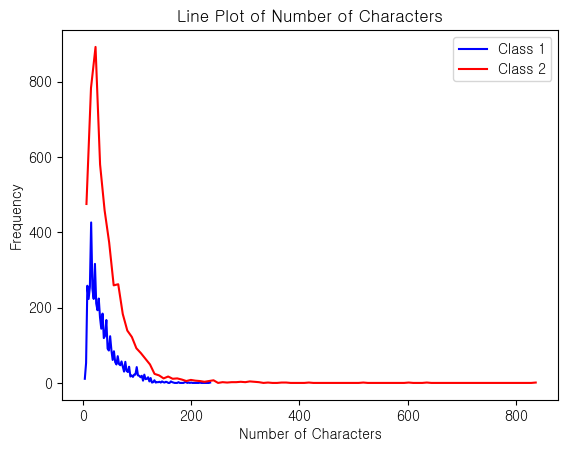

In [3]:
#turn them into transparent line plots
import numpy as np
import matplotlib.pyplot as plt

# Class 1 데이터
hist1, bins1 = np.histogram(class1_char_counts, bins=100)
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2

# Class 2 데이터
hist2, bins2 = np.histogram(class2_char_counts, bins=100)
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# 선 그래프 겹치기
plt.plot(bin_centers1, hist1, color='blue', label='Class 1')
plt.plot(bin_centers2, hist2, color='red', label='Class 2')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.title('Line Plot of Number of Characters')
plt.show()

두 클래스의 글자 수를 겹쳐서 선 그래프로 나타내었다.
앞서 말한 특징들이 도드라지게 나타난다.

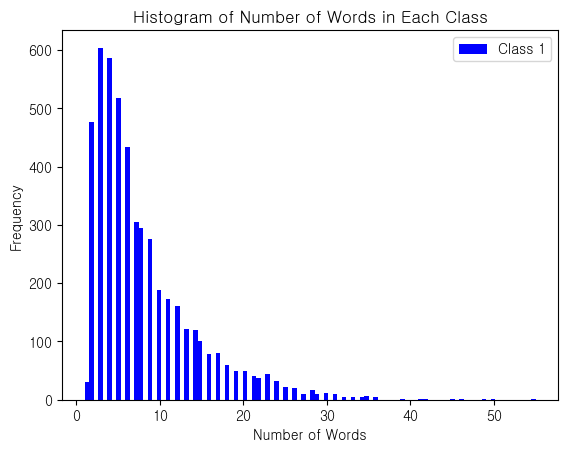

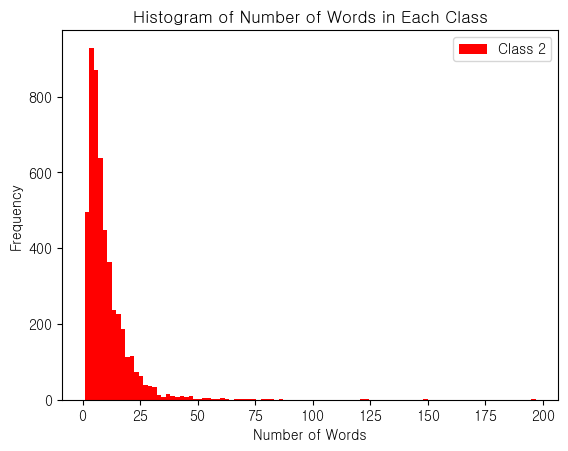

In [4]:
# Calculate the number of words in each class
class1_word_counts = [len(row[0].split()) for row in class1]
class2_word_counts = [len(row[0].split()) for row in class2]

# Two seperate non-transparent plot histograms of number of words in each class with grid, class1 is blue, class2 is red
plt.hist(class1_word_counts, bins=100, label='Class 1', color='blue', alpha=1)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Number of Words in Each Class')
plt.show()
plt.hist(class2_word_counts, bins=100, label='Class 2', color='red', alpha=1)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Number of Words in Each Class')
plt.show()

두 클래스의 단어 수를 비교한다.
글자 수와 비슷한 경향을 보인다.

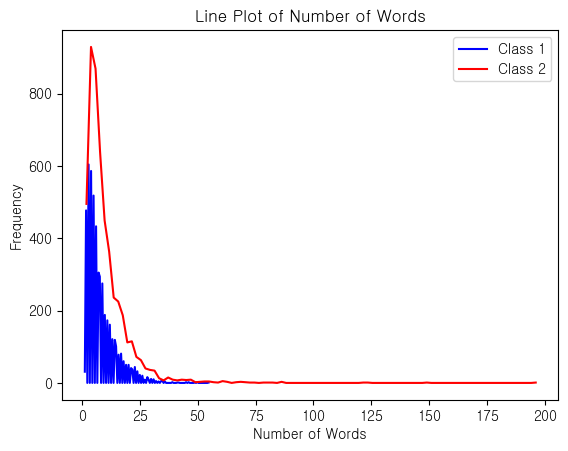

In [5]:
# Class 1 데이터
hist1, bins1 = np.histogram(class1_word_counts, bins=100)
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2

# Class 2 데이터
hist2, bins2 = np.histogram(class2_word_counts, bins=100)
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# 선 그래프 겹치기
plt.plot(bin_centers1, hist1, color='blue', label='Class 1')
plt.plot(bin_centers2, hist2, color='red', label='Class 2')
# plt.xlim([0, 50])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.title('Line Plot of Number of Words')

plt.show()

글자 수의 그래프와 비슷한 경향을 띄었다.

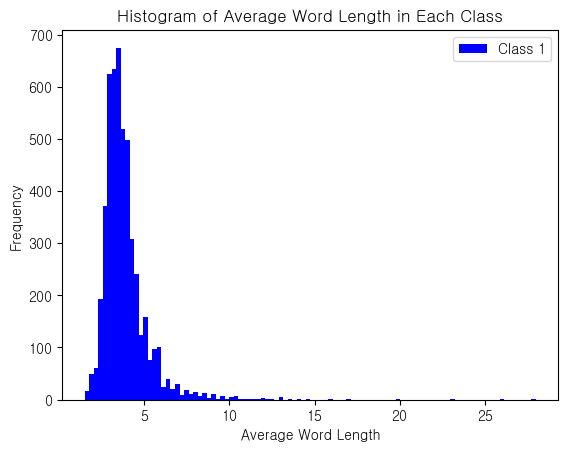

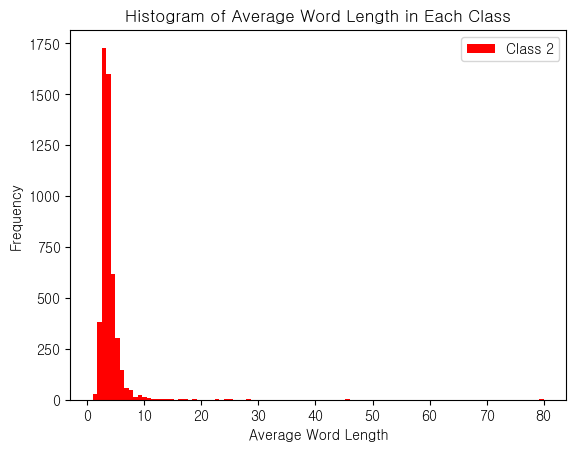

In [6]:
# Calculate the average word length in each class
class1_avg_word_lengths = [sum(len(word) for word in row[0].split()) / len(row[0].split()) for row in class1]
class2_avg_word_lengths = [sum(len(word) for word in row[0].split()) / len(row[0].split()) for row in class2]

# Two seperate non-transparent plot histograms of number of words in each class with grid, class1 is blue, class2 is red
plt.hist(class1_avg_word_lengths, bins=100, label='Class 1', color='blue', alpha=1)
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Average Word Length in Each Class')
# plt.xlim(0, 10)
plt.show()
plt.hist(class2_avg_word_lengths, bins=100, label='Class 2', color='red', alpha=1)
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Average Word Length in Each Class')
# plt.xlim(0, 10)
plt.show()

평균적인 단어 길이를 비교했다.
위의 그래프들과 비슷하게 class2는 class1과 다르게 특정 글자 수 구간에서 단어들이 포화하는 경향을 보였다.

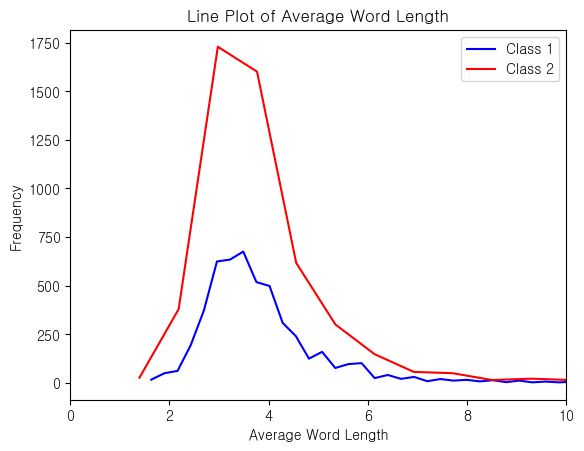

In [7]:
# Class 1 데이터
hist1, bins1 = np.histogram(class1_avg_word_lengths, bins=100)
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2

# Class 2 데이터
hist2, bins2 = np.histogram(class2_avg_word_lengths, bins=100)
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# 선 그래프 겹치기
plt.plot(bin_centers1, hist1, color='blue', label='Class 1')
plt.plot(bin_centers2, hist2, color='red', label='Class 2')
plt.xlim([0, 10])
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Line Plot of Average Word Length')

plt.show()

선 그래프로 겹쳐놓은 모습이다.
앞서 말한 경향이 도드라지게 나타난다.

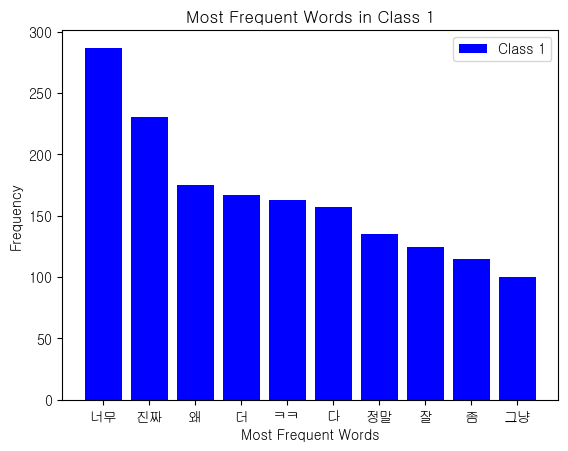

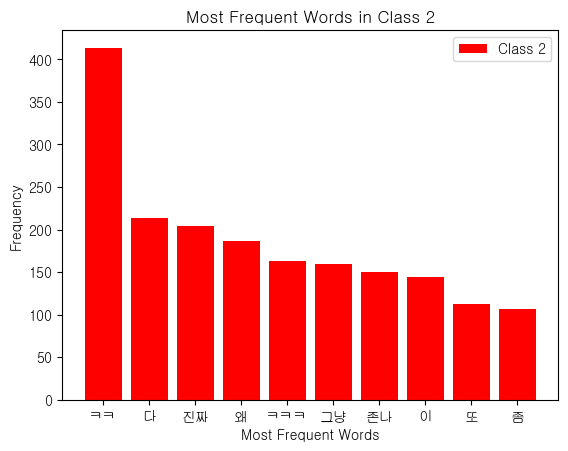

In [8]:
from collections import Counter

# Get the most frequent words in each class
class1_words = [word for row in class1 for word in row[0].split()]
class2_words = [word for row in class2 for word in row[0].split()]
class1_top_words = [word[0] for word in Counter(class1_words).most_common(10)]
class2_top_words = [word[0] for word in Counter(class2_words).most_common(10)]
# Get count of the most frequent words in each class
class1_top_word_counts = [word[1] for word in Counter(class1_words).most_common(10)]
class2_top_word_counts = [word[1] for word in Counter(class2_words).most_common(10)]

# Two seperate non-transparent plot histograms of most frequent words in each class with grid, class1 is blue, class2 is red
plt.bar(class1_top_words, class1_top_word_counts, label='Class 1', color='blue', alpha=1)
plt.xlabel('Most Frequent Words')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Words in Class 1')
plt.show()
plt.bar(class2_top_words, class2_top_word_counts, label='Class 2', color='red', alpha=1)
plt.xlabel('Most Frequent Words')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Words in Class 2')
plt.show()

두 클래스에서 가장 많이 등장하는 단어들을 10개로 추려서 빈도순으로 나열하였다.
class1에서는 '너무'가 280번 정도로 가장 많이 나타났고, class2에서는 'ㅋㅋ'이 다른 단어들을 압도하며 1위를 차지했다.
두 클래스에서 비슷한 빈도로 나타나는 단어들을 제외하고 살펴보겠다.
class1에는 '너무', '더', '정말', '잘', '그냥'의 단어가 있었고,
class2에는 'ㅋㅋ', 'ㅋㅋㅋ', '존나', '이', '또'의 단어가 있었다.

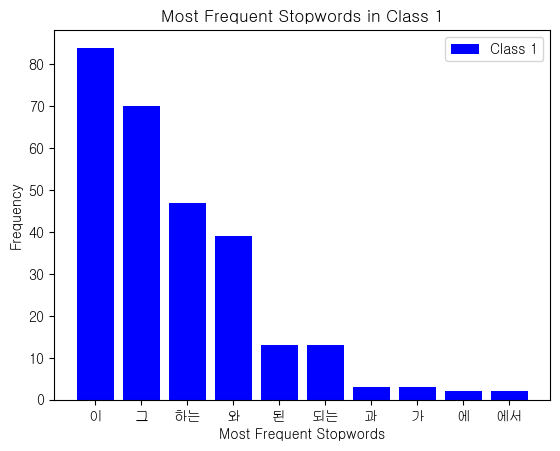

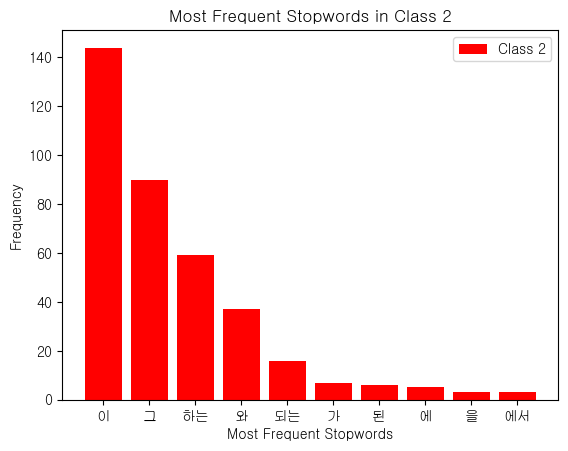

In [9]:
# 데이터에서 등장하는 불용어들을 파악하여 그래프로 나타내기
# Get the most frequent stopwords in each class
# from konlpy.corpus import stopwords

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '과', '와', '으로', '로', '과정에서', '하는', '된', '그', '되는',
    # Add more stopwords as needed
]

class1_stopwords = [word for row in class1 for word in row[0].split() if word in stopwords]
class2_stopwords = [word for row in class2 for word in row[0].split() if word in stopwords]
class1_top_stopwords = [word[0] for word in Counter(class1_stopwords).most_common(10)]
class2_top_stopwords = [word[0] for word in Counter(class2_stopwords).most_common(10)]
# Get count of the most frequent stopwords in each class
class1_top_stopword_counts = [word[1] for word in Counter(class1_stopwords).most_common(10)]
class2_top_stopword_counts = [word[1] for word in Counter(class2_stopwords).most_common(10)]

# Two seperate non-transparent plot histograms of most frequent stopwords in each class with grid, class1 is blue, class2 is red
plt.bar(class1_top_stopwords, class1_top_stopword_counts, label='Class 1', color='blue', alpha=1)
plt.xlabel('Most Frequent Stopwords')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Stopwords in Class 1')
plt.show()
plt.bar(class2_top_stopwords, class2_top_stopword_counts, label='Class 2', color='red', alpha=1)
plt.xlabel('Most Frequent Stopwords')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Stopwords in Class 2')
plt.show()

그리고 불용어를 살펴봤는데, '은', '는', '이', '가', '을', '를', '에', '에서', '의', '과', '와', '으로', '로', '과정에서', '하는', '된', '그', '되는'의 불용어를 사용했다. 두 클래스간의 불용어 등장 차이는 거의 없었다. 불용어 제거가 모델에 도움이 될 것이다.

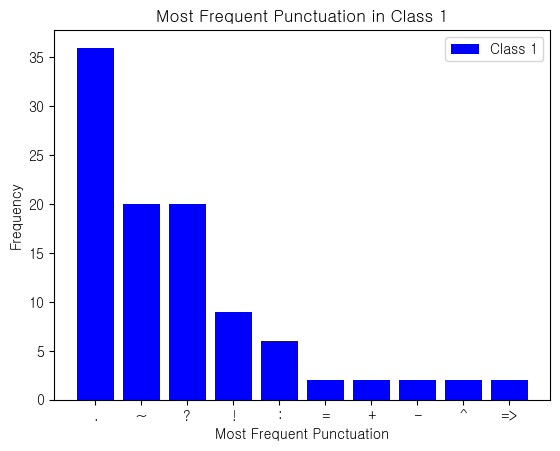

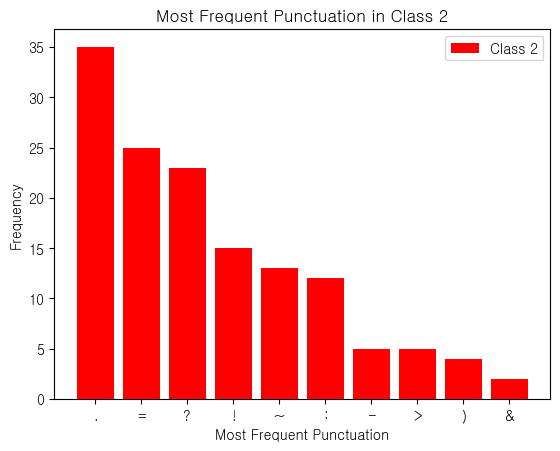

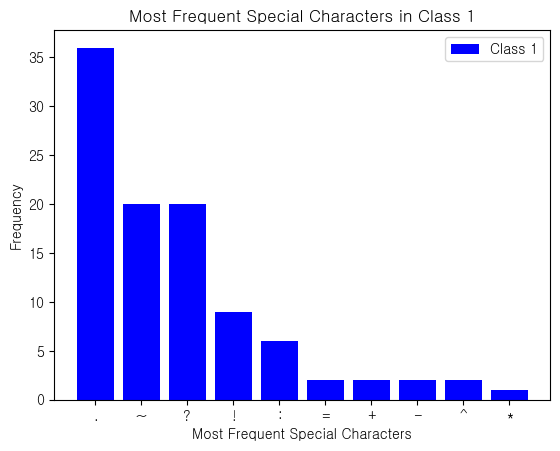

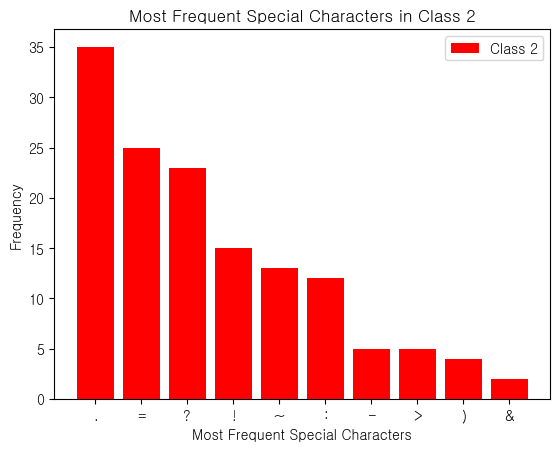

In [10]:
#데이터에 등장하는 구두점, 특수문자들을 파악하여 그래프로 나타내기
# Get the most frequent punctuation in each class
import string

punctuation = string.punctuation

class1_punctuation = [word for row in class1 for word in row[0].split() if word in punctuation]
class2_punctuation = [word for row in class2 for word in row[0].split() if word in punctuation]
class1_top_punctuation = [word[0] for word in Counter(class1_punctuation).most_common(10)]
class2_top_punctuation = [word[0] for word in Counter(class2_punctuation).most_common(10)]
# Get count of the most frequent punctuation in each class
class1_top_punctuation_counts = [word[1] for word in Counter(class1_punctuation).most_common(10)]
class2_top_punctuation_counts = [word[1] for word in Counter(class2_punctuation).most_common(10)]

# Two seperate non-transparent plot histograms of most frequent punctuation in each class with grid, class1 is blue, class2 is red
plt.bar(class1_top_punctuation, class1_top_punctuation_counts, label='Class 1', color='blue', alpha=1)
plt.xlabel('Most Frequent Punctuation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Punctuation in Class 1')
plt.show()
plt.bar(class2_top_punctuation, class2_top_punctuation_counts, label='Class 2', color='red', alpha=1)
plt.xlabel('Most Frequent Punctuation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Punctuation in Class 2')
plt.show()

#데이터에 등장하는 특수문자들을 파악하여 그래프로 나타내기
# Get the most frequent special characters in each class
special_characters = [
    '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+', '[', ']', '{', '}', ';', ':', ',', '.',
    '/', '?', '<', '>', '|', '~', '`', '·', '“', '”', '‘', '’', '→', '←', '↑', '↓', '↔', '!', '@', '#', '$', '%', '^',
    '&', '*', '(', ')', '-', '_', '=', '+', '[', ']', '{', '}', ';', ':', ',', '.', '/', '?', '<', '>', '|', '~',
    '`', '·', '“', '”', '‘', '’', '→', '←', '↑', '↓', '↔',
]

class1_special_characters = [word for row in class1 for word in row[0].split() if word in special_characters]
class2_special_characters = [word for row in class2 for word in row[0].split() if word in special_characters]
class1_top_special_characters = [word[0] for word in Counter(class1_special_characters).most_common(10)]
class2_top_special_characters = [word[0] for word in Counter(class2_special_characters).most_common(10)]
# Get count of the most frequent special characters in each class
class1_top_special_character_counts = [word[1] for word in Counter(class1_special_characters).most_common(10)]
class2_top_special_character_counts = [word[1] for word in Counter(class2_special_characters).most_common(10)]

# Two seperate non-transparent plot histograms of most frequent special characters in each class with grid, class1 is blue, class2 is red
plt.bar(class1_top_special_characters, class1_top_special_character_counts, label='Class 1', color='blue', alpha=1)
plt.xlabel('Most Frequent Special Characters')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Special Characters in Class 1')
plt.show()
plt.bar(class2_top_special_characters, class2_top_special_character_counts, label='Class 2', color='red', alpha=1)
plt.xlabel('Most Frequent Special Characters')
plt.ylabel('Frequency')
plt.legend()
plt.title('Most Frequent Special Characters in Class 2')
plt.show()

두 클래스간에 등장하는 구두점이나 특수문자에는 큰 차이점이 없었다.